In [2]:
import numpy as np
import pandas as pd
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import scipy.optimize as opt

def throughoutOutliers(data):
    for i in range(1,len(data)):
        if(np.abs(data[i]-data[i-1])>0.005*data[i]):
            try:
                data[i]=(data[i-1]+data[i+1])/2
            except IndexError:
                data[i]=data[i-1]
    return data

In [3]:
trail1 =np.loadtxt("norm/1011_RXC.txt",) ## not good carbon data
#trail1[0]=throughoutOutliers(trail1[0])
#trail1[1]=throughoutOutliers(trail1[1])
#trail1[2]=throughoutOutliers(trail1[2])
#trail1[3]=throughoutOutliers(trail1[3])
trail2 =np.loadtxt("norm/1013_RXC.txt",)
trail2[0]=throughoutOutliers(trail2[0])
trail2[1]=throughoutOutliers(trail2[1])
trail2[2]=throughoutOutliers(trail2[2])
trail2[3]=throughoutOutliers(trail2[3])
trail3 =np.loadtxt("norm/1013_RXCa.txt",)
trail3[0]=throughoutOutliers(trail3[0])
trail3[1]=throughoutOutliers(trail3[1])
trail3[2]=throughoutOutliers(trail3[2])
trail3[3]=throughoutOutliers(trail3[3])

trail4 =np.loadtxt("norm/1016_RXC.txt",)
trail4[0]=throughoutOutliers(trail4[0])
trail4[1]=throughoutOutliers(trail4[1])
trail4[2]=throughoutOutliers(trail4[2])
trail4[3]=throughoutOutliers(trail4[3])
trail5 =np.loadtxt("norm/1016_RXCb.txt",)
trail5[0]=throughoutOutliers(trail5[0])
trail5[1]=throughoutOutliers(trail5[1])
trail5[2]=throughoutOutliers(trail5[2])
trail5[3]=throughoutOutliers(trail5[3])
trails1 =np.loadtxt("norm/1017_RXC_super1.txt",)
trails2 =np.loadtxt("norm/1017_RXC_super2.txt",)
trails3 =np.loadtxt("norm/1017_RXC_super3.txt",)

In [18]:
tempconversion=np.flip(pd.read_csv("Si_Diode_Specs_New.csv", header=None).to_numpy().T,axis=1)
tempconversion[1]

array([0.09062, 0.10191, 0.12547, 0.14985, 0.17464, 0.19961, 0.22463,
       0.24963, 0.27456, 0.29941, 0.32416, 0.34881, 0.37337, 0.39783,
       0.42221, 0.44647, 0.47069, 0.49484, 0.51892, 0.54294, 0.5669 ,
       0.5908 , 0.61465, 0.63841, 0.66208, 0.68564, 0.70908, 0.73238,
       0.75554, 0.77855, 0.80138, 0.82404, 0.8465 , 0.86873, 0.89072,
       0.91243, 0.93383, 0.95487, 0.9755 , 0.98564, 0.99565, 1.00552,
       1.01525, 1.02482, 1.03425, 1.04353, 1.05267, 1.05629, 1.05988,
       1.06346, 1.067  , 1.07053, 1.07402, 1.07748, 1.08093, 1.08436,
       1.08781, 1.09131, 1.0949 , 1.09864, 1.10263, 1.10702, 1.10945,
       1.11212, 1.11517, 1.11896, 1.12463, 1.13598, 1.15558, 1.17705,
       1.19645, 1.2144 , 1.22314, 1.23184, 1.24053, 1.24928, 1.2581 ,
       1.26702, 1.27607, 1.28527, 1.29464, 1.30422, 1.31403, 1.32412,
       1.33453, 1.3453 , 1.35647, 1.36809, 1.38021, 1.39287, 1.40615,
       1.42013, 1.43488, 1.45048, 1.467  , 1.48443, 1.50272, 1.52166,
       1.54097, 1.56

In [23]:
tempconspline= inter.InterpolatedUnivariateSpline(tempconversion[1],tempconversion[0])
trail4[0]=tempconspline(trail4[0])

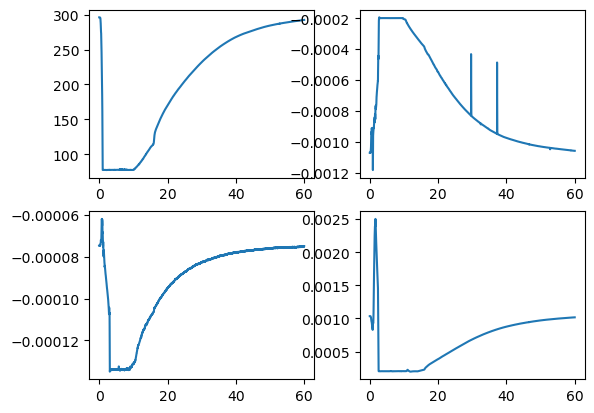

In [24]:
xrange=np.linspace(0,60,len(trail4[0]))
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].plot(xrange,trail4[0])
ax[0][1].plot(xrange,trail4[1])
ax[1][0].plot(xrange,trail4[2])
ax[1][1].plot(xrange,trail4[3])

In [28]:
(trail1[0][1-1]+trail1[0][1+1])/2

0.73952085

In [29]:
len(trail3[0])

4500

In [31]:
trail3

array([[ 5.11500600e-001,  5.11564900e-001,  5.11631400e-001, ...,
         4.63378416e-199,  2.31689208e-199,  2.31689208e-199],
       [-1.09642600e-003, -1.09604000e-003, -1.09540700e-003, ...,
        -4.32240514e-202, -2.16120257e-202, -2.16120257e-202],
       [-7.35466100e-005, -7.35804500e-005, -7.36099350e-005, ...,
        -3.17387423e-203, -1.58693711e-203, -1.58693711e-203],
       [ 1.07293700e-003,  1.07243800e-003,  1.07242900e-003, ...,
         8.12600457e-202,  4.06300228e-202,  4.06300228e-202]])

In [32]:
print("\ufeff1")

﻿1
